In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
card_data = pd.read_csv('creditcard.csv')

In [3]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card_data.shape

(284807, 31)

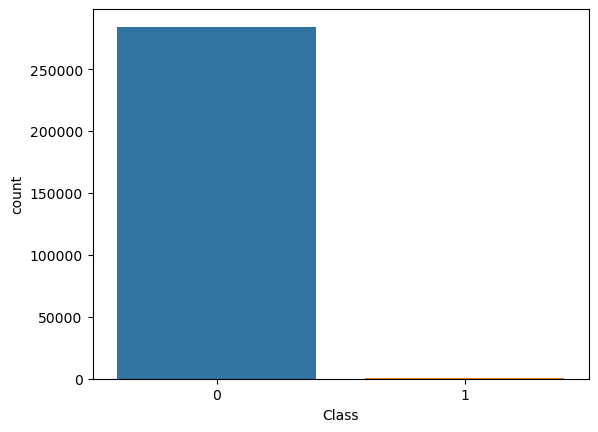

In [5]:
sns.countplot(data=card_data, x='Class')
plt.show()

In [6]:
card_data['Class'].value_counts()[1] / card_data.shape[0]*100

0.1727485630620034

In [7]:
card_data.drop(columns='Time', inplace=True)

In [8]:
X = card_data.drop(columns='Class')
y = card_data.Class

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [11]:
logreg = LogisticRegression(max_iter=1000)

In [12]:
puntuaciones = cross_val_score(logreg, X_train_res, y_train_res, cv=5)

In [13]:
print(f"Puntuaciones de validación cruzada: {puntuaciones}")
print(f"Puntuación media de validación cruzada: {puntuaciones.mean()}")

Puntuaciones de validación cruzada: [0.96021147 0.96145349 0.96065069 0.96054078 0.96032095]
Puntuación media de validación cruzada: 0.9606354766652825


In [14]:
logreg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = logreg.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[55809,  1055],
       [    9,    89]], dtype=int64)

In [17]:
# Crear y entrenar el modelo de Gradient Boosting
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train_res, y_train_res)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [18]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Exactitud (Accuracy): {accuracy:.2f}')
print(f'Matriz de Confusión:\n{conf_matrix}')
print(f'Reporte de Clasificación:\n{report}')

Exactitud (Accuracy): 0.99
Matriz de Confusión:
[[56020   844]
 [    7    91]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.93      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.58     56962
weighted avg       1.00      0.99      0.99     56962



Exactitud (Accuracy): 1.00
Matriz de Confusión:
[[56843    21]
 [   39    59]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962